In [1]:
import numpy as np

# Definimos la función f(x) como la suma de un seno y medio seno de doble frecuencia
def f(x):
    return np.sin(x) + 0.5 * np.sin(2 * x)

# Período de la función
T = 2 * np.pi

# Número de términos en la expansión de Fourier
N = 10

# Definimos un rango de valores para x (100 puntos en el intervalo [0, T])
x = np.linspace(0, T, 100)

# Evaluamos la función en los puntos definidos
y = f(x)

# Inicializamos los coeficientes de Fourier (a_n y b_n) como arreglos de ceros
a = np.zeros(N)
b = np.zeros(N)

# Calculamos el término constante de la serie (a_0 / 2), usando integración numérica (trapecios)
sum_F = (2 / T) * np.trapz(y * np.cos(0 * 2 * np.pi * x / T), x) / 2

# Iteramos sobre los índices para calcular los coeficientes a_n y b_n
for i in range(1, N):
    # Coeficiente a_n: integración numérica para el coseno
    a[i] = (2 / T) * np.trapz(y * np.cos(i * 2 * np.pi * x / T), x)
    # Coeficiente b_n: integración numérica para el seno
    b[i] = (2 / T) * np.trapz(y * np.sin(i * 2 * np.pi * x / T), x)
    # Sumamos el término correspondiente a_n * cos(nωt) + b_n * sin(nωt) a la expansión
    sum_F = sum_F + a[i] * np.cos(i * 2 * np.pi * x / T) + b[i] * np.sin(i * 2 * np.pi * x / T)

# En este punto, sum_F contiene la aproximación de la función f(x) con la serie de Fourier.


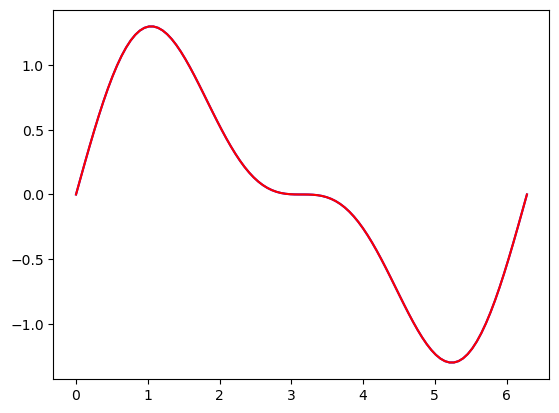

In [3]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'b')
plt.plot(x, sum_F, 'r')


[-1.46327603e-17  1.15957723e-17 -4.96961669e-18  2.62285325e-17
  1.69795237e-17  9.52509866e-18  3.58916761e-18 -2.34952434e-16
 -3.16122839e-17  5.24570651e-17]
[ 0.00000000e+00  1.00000000e+00  5.00000000e-01  5.61842776e-17
  3.38210025e-18  1.31142663e-17 -5.08695486e-17 -1.36250324e-16
  4.14134724e-19 -2.08999991e-16]


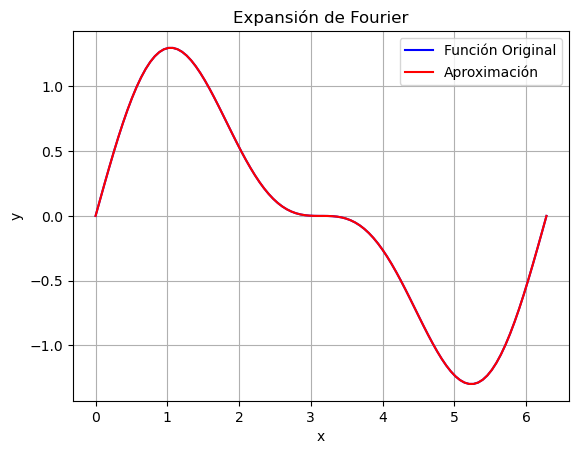

In [8]:
# Período de la función
T = 2 * np.pi

# Número de términos en la expansión de Fourier
N = 10

# Frecuencia angular fundamental (omega)
w = 2 * np.pi / T

# Definimos un rango de valores para x (100 puntos en el intervalo [0, T])
x = np.linspace(0, T, 100)

# Función a aproximar (suma de senos con diferentes frecuencias)
y = np.sin(x) + 0.5 * np.sin(2 * x)

# Inicializamos los coeficientes de Fourier (a_n y b_n) como arreglos de ceros
a = np.zeros(N)
b = np.zeros(N)

# Cálculo de los coeficientes de Fourier usando integración numérica
for i in range(0, N):
    # Coeficiente a_n: relacionado con la proyección sobre cosenos
    a[i] = (2 / T) * np.trapz(y * np.cos(i * x * w), x)
    # Coeficiente b_n: relacionado con la proyección sobre senos
    b[i] = (2 / T) * np.trapz(y * np.sin(i * x * w), x)

# Imprimimos los coeficientes de Fourier calculados
print(a)
print(b)

# Reconstrucción de la función usando la serie de Fourier
y_aprox = a[0] / 2  # Término constante a_0 / 2
for i in range(1, N):
    # Agregamos los términos armónicos a la suma: a_n * cos(nωt) + b_n * sin(nωt)
    y_aprox += a[i] * np.cos(i * w * x) + b[i] * np.sin(i * w * x)

# Graficamos la función original (en azul) y la aproximación (en rojo)
plt.plot(x, y, 'b', label='Función Original')       # Función original
plt.plot(x, y_aprox, 'r', label='Aproximación')    # Aproximación de Fourier
plt.legend()
plt.title('Expansión de Fourier')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
